In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

from scipy.stats import skew

In [42]:
df = sns.load_dataset("penguins")


In [43]:
missing_values = df.isnull().sum()
missing_ratio = missing_values / len(df)
treshold = 0.7


less = missing_values[(missing_ratio < treshold) & (missing_values > 0)].index
over = missing_values[missing_ratio > treshold].index


numeric_features = df[less].select_dtypes(include="number").columns
kategorical_features = df[less].select_dtypes(include="object").columns

df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

for col in kategorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

missing_values = df.isnull().sum()
missing_values[missing_values > 0]



Series([], dtype: int64)

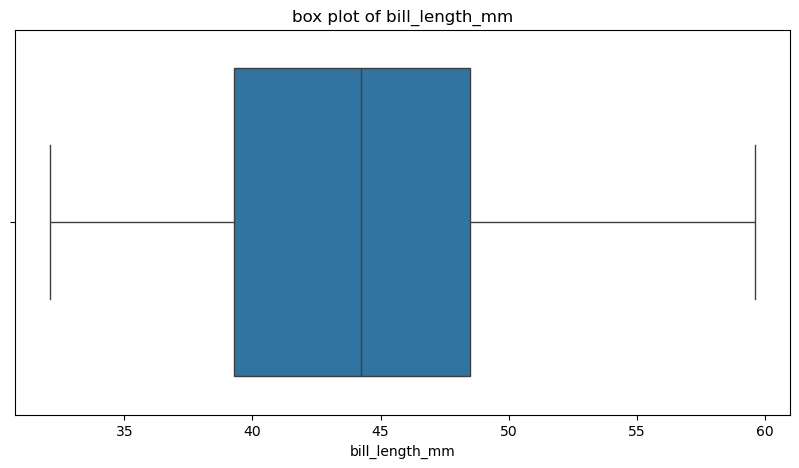

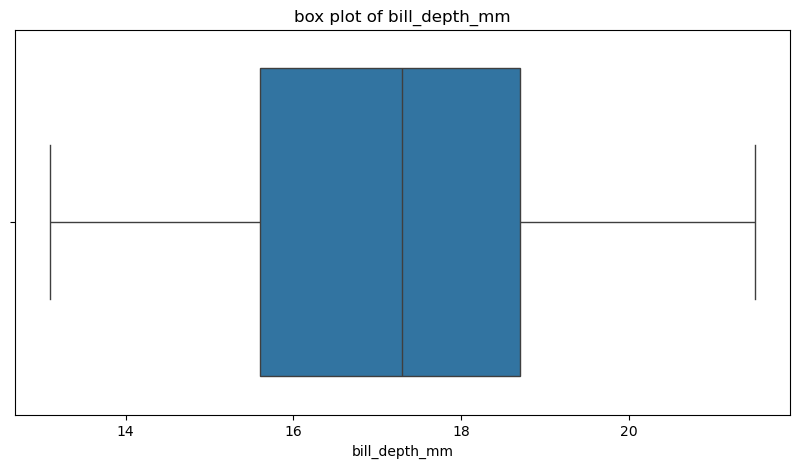

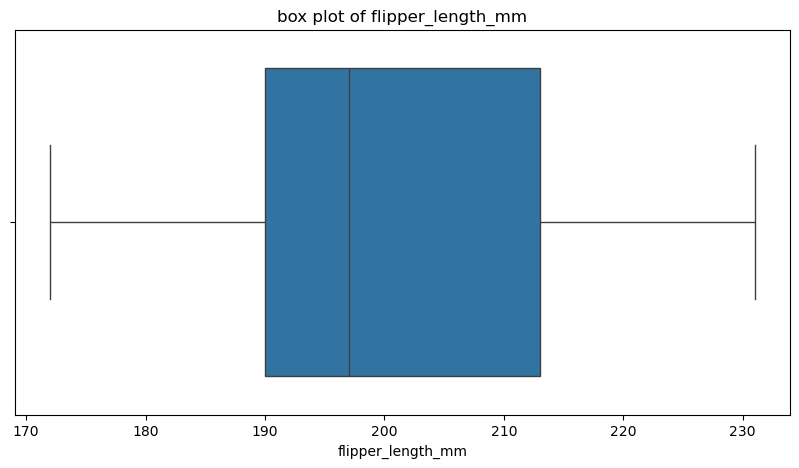

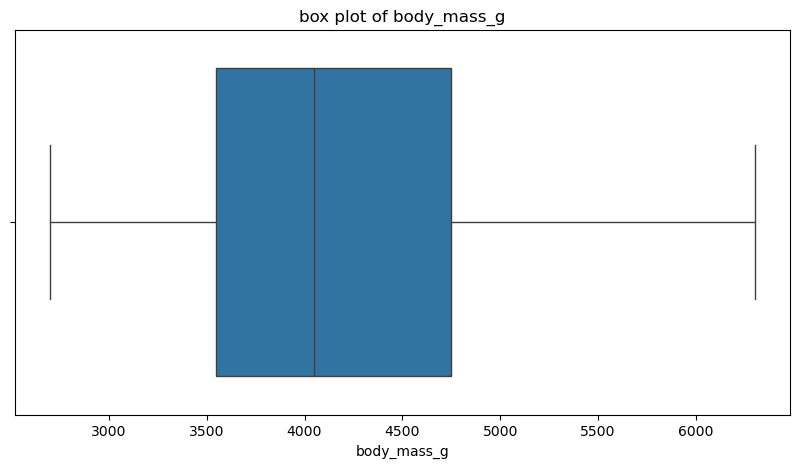

In [44]:
# cek outlier
# pada data ini tidak ada outlier

for features in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[features])
    plt.title(f"box plot of {features}")

Text(0.5, 1.0, 'Histogram setelah standarisasi')

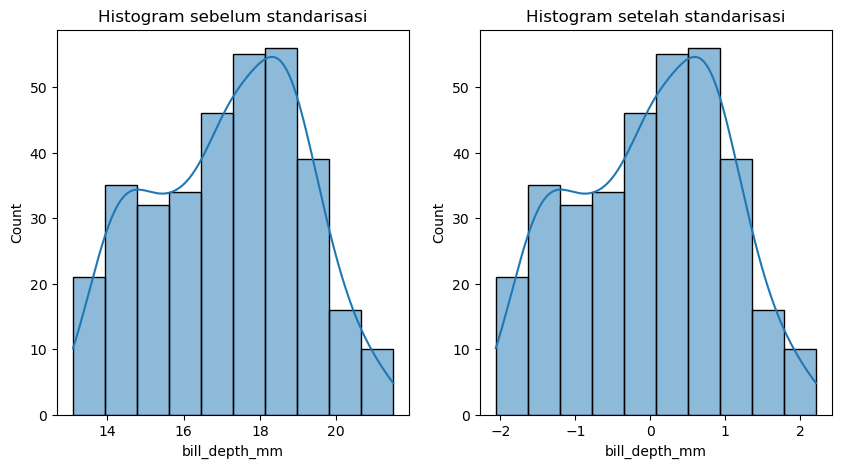

In [45]:
scaler = StandardScaler()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df[numeric_features[1]], kde=True)
plt.title("Histogram sebelum standarisasi")

df[numeric_features] = scaler.fit_transform(df[numeric_features])

plt.subplot(1,2,2)
sns.histplot(df[numeric_features[1]], kde=True)
plt.title("Histogram setelah standarisasi")


In [46]:
# encoding label

kategorical_features = df.select_dtypes(include="object")

label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in kategorical_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])


df_lencoder



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,1
1,0,2,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0
2,0,2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0
3,0,2,-1.307172e-15,1.806927e-15,0.000000,0.000000,1
4,0,2,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0
...,...,...,...,...,...,...,...
339,2,0,-1.307172e-15,1.806927e-15,0.000000,0.000000,1
340,2,0,5.294731e-01,-1.450118e+00,1.006038,0.811880,0
341,2,0,1.191758e+00,-7.380718e-01,1.506028,1.939064,1
342,2,0,2.351241e-01,-1.195816e+00,0.791756,1.250229,0


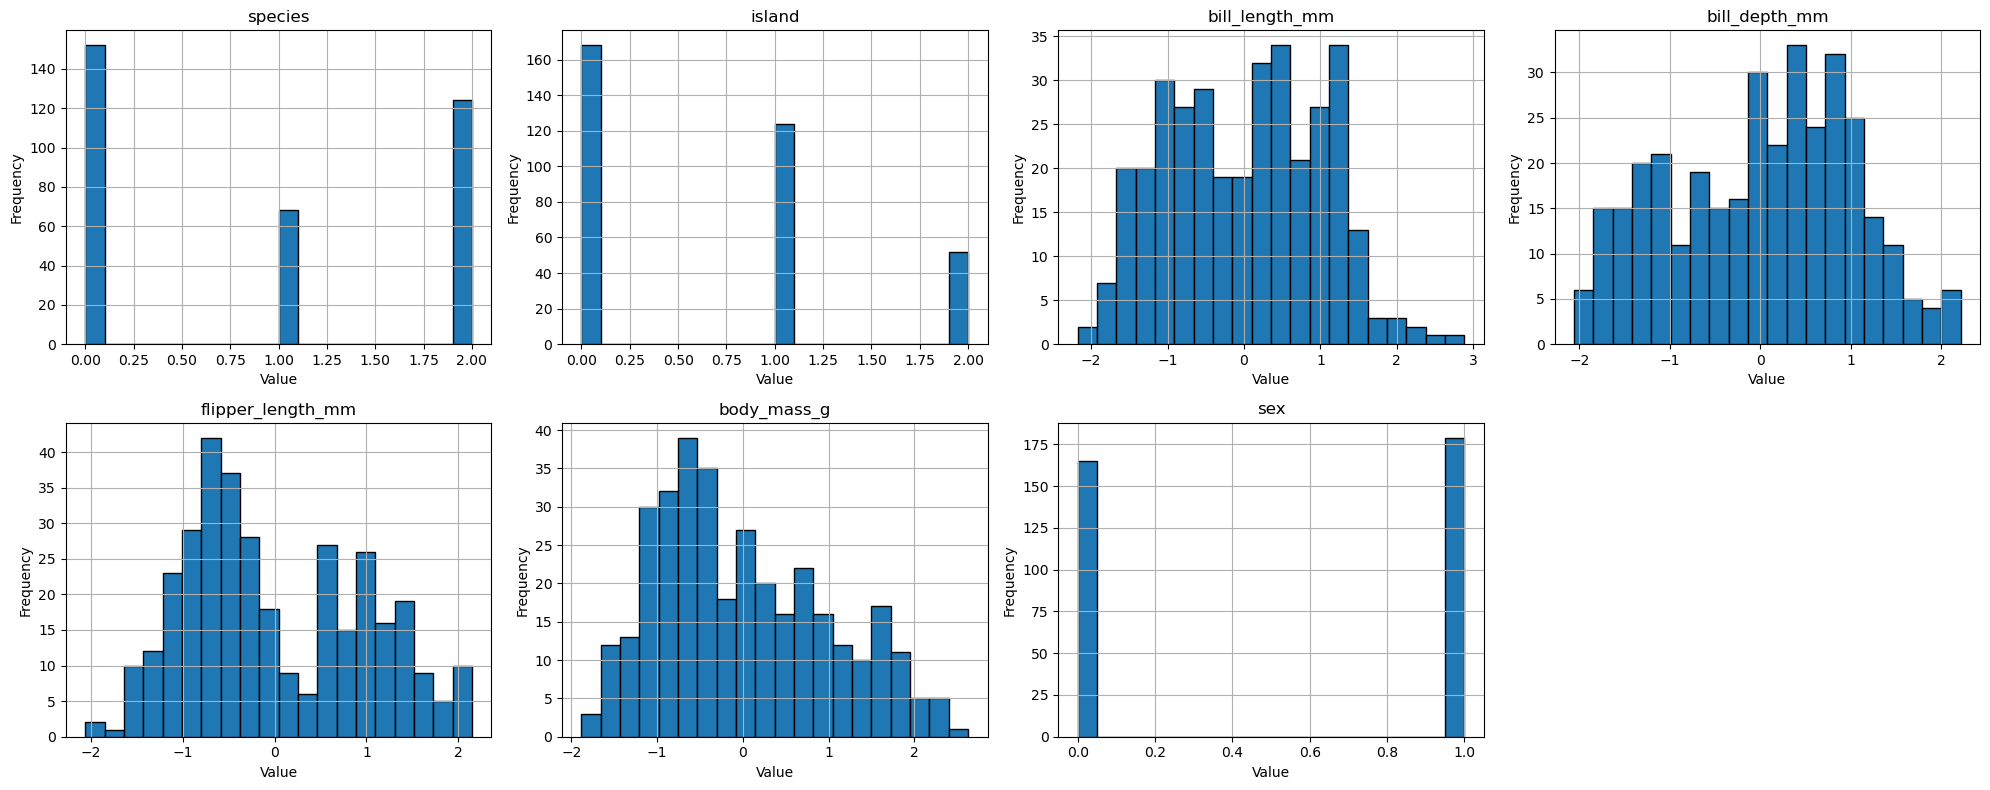

In [47]:
num_vars = df_lencoder.shape[1]
n_cols = 4
n_rows = -(-num_vars // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
plt.tight_layout()
plt.show()

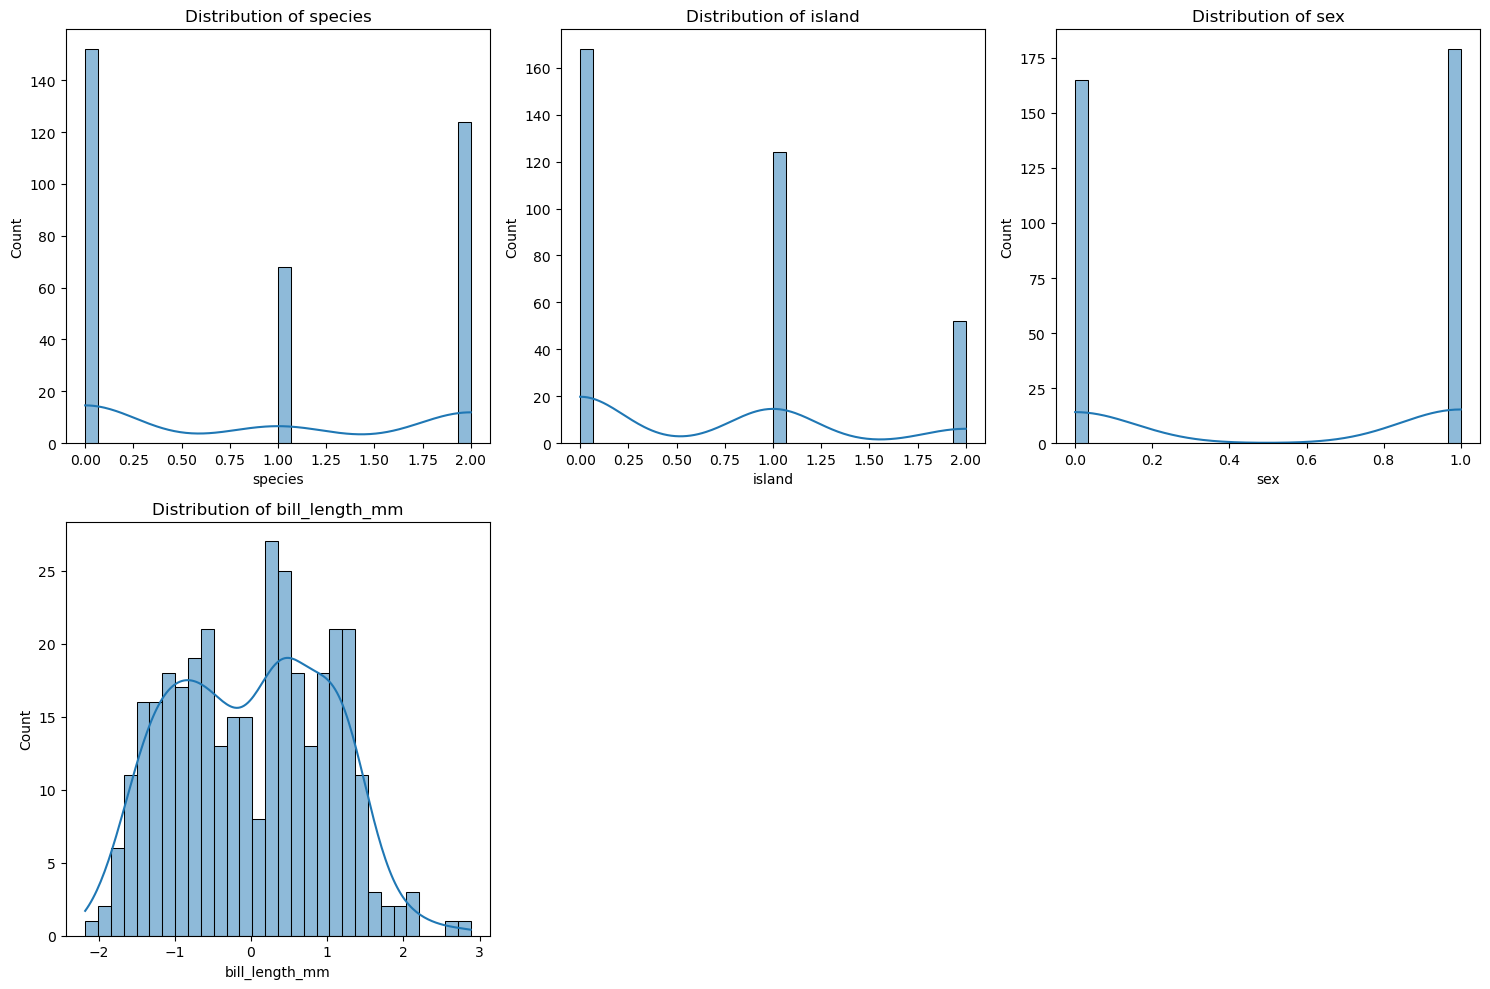

In [48]:
columns_to_plot = ["species", "island", "sex", "bill_length_mm"]

plt.figure(figsize=(15,10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2,3,i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()


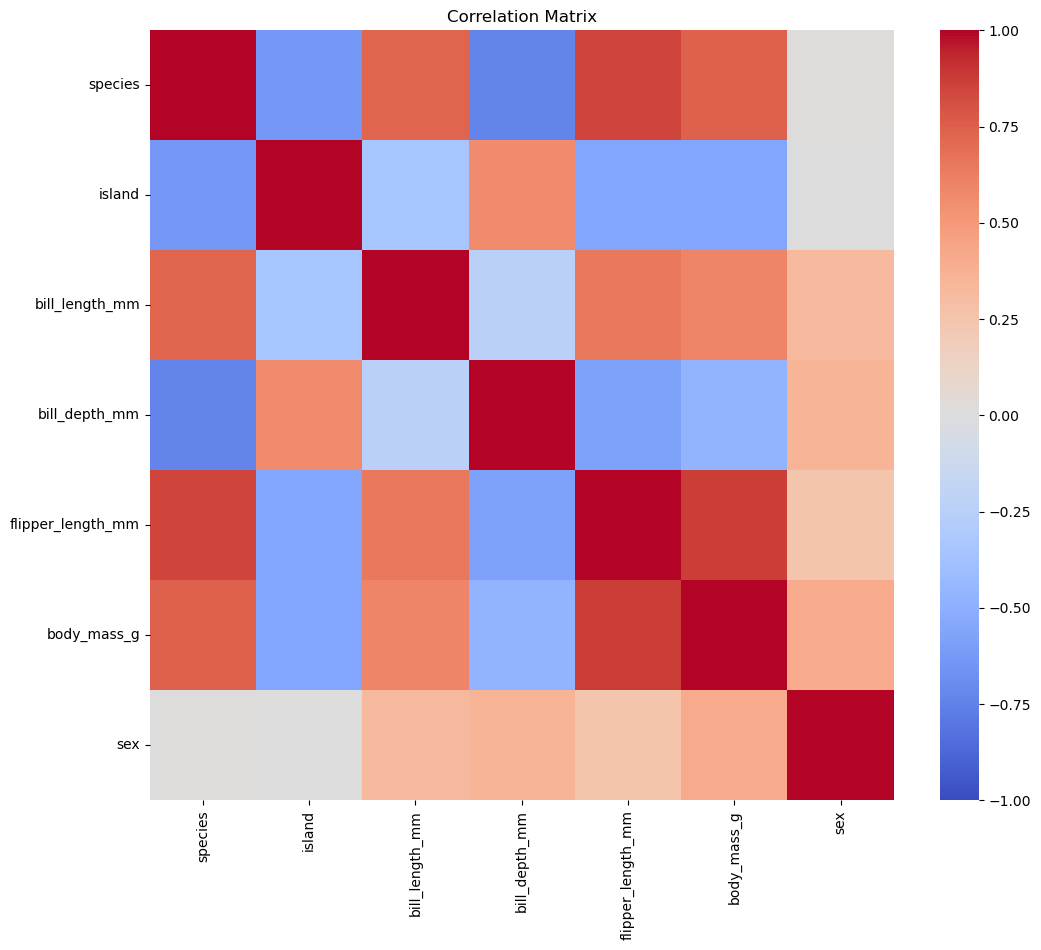

In [49]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [50]:
# simpan ke file CSV
df_lencoder.to_csv("df_lencoder.csv", index=False)
